# tf_tutorial_quick_start_by_mnist
- ref: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ja

In [59]:
import tensorflow as tf
import tensorflow.keras.layers as layers

## prepare dataset

- numpy.arrayが返ってくる。

In [60]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

- 8bitの最大値(255)で正規化して0～1にする。

In [61]:
# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

## define model

In [62]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

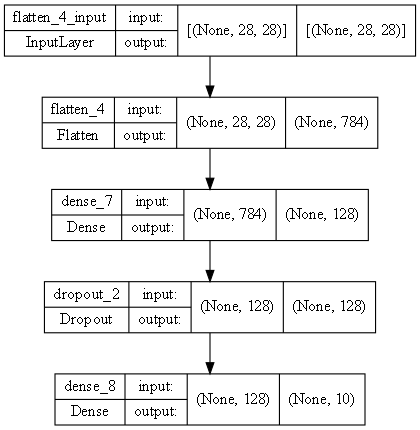

In [63]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True, dpi=80)

## loss and metics

- 学習前のmodelにデータを入力すると以下のように出力される。

In [64]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.05321139,  0.2938148 ,  0.67400503,  0.4111094 ,  0.48485854,
        -0.04672196,  0.60784924, -0.29263   , -0.95106184,  0.35700166]],
      dtype=float32)

- クラス分類する場合、softmaxなどで確率値に変換

In [65]:
tf.nn.softmax(predictions).numpy()

array([[0.07444452, 0.10532811, 0.15404898, 0.11843626, 0.127501  ,
        0.0749292 , 0.14418752, 0.05859419, 0.03033201, 0.11219823]],
      dtype=float32)

- 実際には、softmaxをNNには組み込まない。(微分が不安定なため)
- なので、softmax込みでpredictionsと正解ラベルからcross entropyを計算する関数があり、以下のように使える。

In [66]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

2.5912118

## training define

- metricsの指定など、隠蔽化が激しくてきついなぁ。

In [67]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

## training sequence

In [68]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2953 - accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1439 - accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1061 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0878 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0742 - accuracy: 0.9770


## evaluate

In [58]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 2.2944 - accuracy: 0.1135 - 779ms/epoch - 2ms/step


[2.2943930625915527, 0.11349999904632568]

- modelが今のままでは確率値を返さない。
- なのでsoftmaxを接続したい場合は以下のようにつなげる。

In [69]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [70]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[3.11153627e-07, 3.18935314e-08, 2.75032435e-05, 1.60089857e-03,
        2.93631126e-11, 3.12762131e-06, 2.62489184e-12, 9.98356998e-01,
        4.90875891e-06, 6.23484129e-06],
       [1.20451604e-08, 2.78226362e-04, 9.99711096e-01, 1.03884258e-05,
        8.56050804e-17, 1.39238850e-07, 3.82809020e-08, 5.20425771e-13,
        1.61261624e-07, 4.10255792e-15],
       [9.92832838e-08, 9.99278605e-01, 8.31085054e-05, 6.78756669e-06,
        1.38862288e-05, 1.64194284e-06, 5.41483996e-06, 5.51891630e-04,
        5.43214337e-05, 4.11505380e-06],
       [9.99971032e-01, 9.97100180e-10, 2.88296496e-06, 9.70017311e-08,
        5.79182613e-09, 2.74812692e-07, 1.30719209e-05, 1.70538840e-06,
        2.46776324e-08, 1.09414532e-05],
       [3.49014772e-05, 3.04255265e-09, 1.15583716e-04, 2.83892496e-06,
        9.76199925e-01, 1.28576642e-06, 2.22322979e-05, 2.46340467e-04,
        1.00561329e-05, 2.33668163e-02]], dtype=float32)>

In [71]:
# 以上